In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import gc
import fitsio
import numpy as np
from fpfs import pltutil
import matplotlib.pylab as plt

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

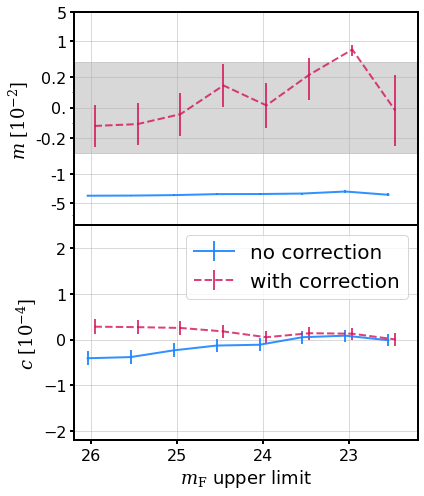

In [8]:
outs=fitsio.read('detect_magcut.fits')

ave=np.average(outs,axis=0)
x=ave[0,:]
y1=ave[1,:]/ave[4,:]/0.04-1
y2=ave[1,:]/ave[5,:]/0.04-1
z1=ave[2,:]/ave[4,:]
z2=ave[3,:]/ave[5,:]
ysub=outs[:,1,:]/ave[5,:]/0.04-1
zsub=outs[:,3,:]/ave[5,:]

zsub=zsub.reshape(len(zsub)//4,4,8)
zsub=np.average(zsub,axis=1)
yerr=np.std(ysub,axis=0)/np.sqrt(len(ysub))
zerr=np.std(zsub,axis=0)/np.sqrt(len(zsub))

# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel=r'$m_{\rm F}$ upper limit';
ax.errorbar(np.array(x)+0.04,np.array(y1)*1e2,np.array(yerr)*1e2,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.04,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[2],ls='--')
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_yscale('symlog',linthresh=0.3)
ax.set_yticks([-5,-1,-0.2,0.,0.2,1,5])
ax.set_yticklabels(['-5','-1','-0.2','0.','0.2','1','5'])
ax.set_xlim(22.2,26.2)
ax.set_ylim(-20,5.)
ax.invert_xaxis()
ax.tick_params(width=2,size=4)
ax.set_xticklabels([])
ax.grid()
ax.spines['bottom'].set_visible(False)
ax.axhspan(-0.3,0.3,0,100,color='gray',alpha=0.3)


ax=axes[1]
ax.errorbar(np.array(x)+0.04,np.array(z1)*1e4,np.array(zerr)*1e4,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.04,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[2],ls='--')
ax.legend()
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(22.2,26.2)
ax.set_ylim(-2.2,2.5)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
#ax.fill_between(cbin,hist,color=pltutil.colors[-1],alpha=0.2)
ax.grid()
ax.invert_xaxis()
plt.tight_layout(h_pad=-0.2)
fig.savefig('blend_magcut.pdf')

In [9]:
y2

array([-0.00121466, -0.00109251, -0.00043467,  0.00146566,  0.00014404,
        0.00217569,  0.00614426, -0.00019731])

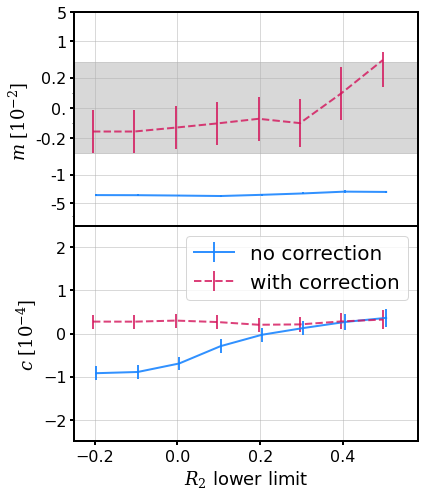

In [4]:
outs=fitsio.read('detect_r2cut.fits')

ave=np.average(outs,axis=0)
x=ave[0,:]
y1=ave[1,:]/ave[4,:]/0.04-1
y2=ave[1,:]/ave[5,:]/0.04-1
z1=ave[2,:]/ave[4,:]
z2=ave[3,:]/ave[5,:]
ysub=outs[:,1,:]/ave[5,:]/0.04-1
zsub=outs[:,3,:]/ave[5,:]
zsub=zsub.reshape(len(zsub)//4,4,8)
zsub=np.average(zsub,axis=1)
yerr=np.std(ysub,axis=0)/np.sqrt(len(ysub))
zerr=np.std(zsub,axis=0)/np.sqrt(len(zsub))

# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel='$R_{2}$ lower limit';
ax.errorbar(np.array(x)+0.004,np.array(y1)*1e2,np.array(yerr)*1e2,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.004,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[2],ls='--')
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_yscale('symlog',linthresh=0.3)
ax.set_yticks([-5,-1,-0.2,0.,0.2,1,5])
ax.set_yticklabels(['-5','-1','-0.2','0.','0.2','1','5'])
ax.set_xlim(-0.25,0.58)
ax.set_ylim(-20,5.)
ax.tick_params(width=2,size=4)
ax.set_xticklabels([])
ax.grid()
ax.spines['bottom'].set_visible(False)
ax.axhspan(-0.3,0.3,0,100,color='gray',alpha=0.3)

ax=axes[1]
ax.errorbar(np.array(x)+0.004,np.array(z1)*1e4,np.array(zerr)*1e4,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.004,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[2],ls='--')
ax.legend()
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(-0.25,0.58)
ax.set_ylim(-2.5,2.5)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
#ax.fill_between(cbin,hist,color=pltutil.colors[-1],alpha=0.2)
ax.grid()
plt.tight_layout(h_pad=-0.2)
fig.savefig('blend_r2cut.pdf')

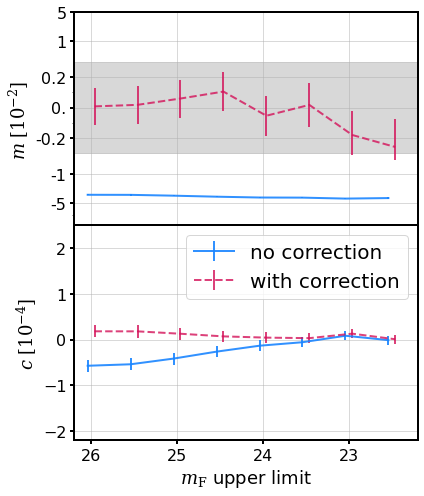

In [5]:
outs=fitsio.read('detect_magcut_2.fits')

ave=np.average(outs,axis=0)
x=ave[0,:]
y1=ave[1,:]/ave[4,:]/0.04-1
y2=ave[1,:]/ave[5,:]/0.04-1
z1=ave[2,:]/ave[4,:]
z2=ave[3,:]/ave[5,:]
ysub=outs[:,1,:]/ave[5,:]/0.04-1
zsub=outs[:,3,:]/ave[5,:]
zsub=zsub.reshape(len(outs)//4,4,8)
zsub=np.average(zsub,axis=1)
yerr=np.std(ysub,axis=0)/np.sqrt(len(ysub))
zerr=np.std(zsub,axis=0)/np.sqrt(len(zsub))

# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel=r'$m_{\rm F}$ upper limit';
ax.errorbar(np.array(x)+0.04,np.array(y1)*1e2,np.array(yerr)*1e2,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.04,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[2],ls='--')
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_yscale('symlog',linthresh=0.3)
ax.set_yticks([-5,-1,-0.2,0.,0.2,1,5])
ax.set_yticklabels(['-5','-1','-0.2','0.','0.2','1','5'])
ax.set_xlim(22.2,26.2)
ax.set_ylim(-20,5.)
ax.invert_xaxis()
ax.tick_params(width=2,size=4)
ax.set_xticklabels([])
ax.grid()
ax.spines['bottom'].set_visible(False)
ax.axhspan(-0.3,0.3,0,100,color='gray',alpha=0.3)


ax=axes[1]
ax.errorbar(np.array(x)+0.04,np.array(z1)*1e4,np.array(zerr)*1e4,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.04,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[2],ls='--')
ax.legend()
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(22.2,26.2)
ax.set_ylim(-2.2,2.5)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
#ax.fill_between(cbin,hist,color=pltutil.colors[-1],alpha=0.2)
ax.grid()
ax.invert_xaxis()
plt.tight_layout(h_pad=-0.2)
fig.savefig('blend2_magcut.pdf')

In [5]:
y2

array([-4.13099784e-04, -3.08202512e-04,  9.50575910e-05,  3.47849936e-04,
       -9.34634664e-04, -9.31149543e-04, -2.57678658e-03, -3.61103618e-03])

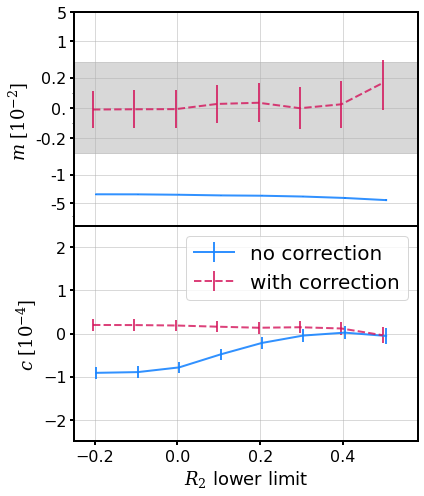

In [7]:
outs=fitsio.read('detect_r2cut_2.fits')

ave=np.average(outs,axis=0)
x=ave[0,:]
y1=ave[1,:]/ave[4,:]/0.04-1
y2=ave[1,:]/ave[5,:]/0.04-1
z1=ave[2,:]/ave[4,:]
z2=ave[3,:]/ave[5,:]
ysub=outs[:,1,:]/ave[5,:]/0.04-1
zsub=outs[:,3,:]/ave[5,:]
zsub=zsub.reshape(len(outs)//4,4,8)
zsub=np.average(zsub,axis=1)
yerr=np.std(ysub,axis=0)/np.sqrt(len(ysub))
zerr=np.std(zsub,axis=0)/np.sqrt(len(zsub))

# make plot
plt.close()
fig,axes=pltutil.make_figure_axes(ny=2,nx=1,square=False)
ax=axes[0]
xlabel='$R_{2}$ lower limit';
ax.errorbar(np.array(x)+0.004,np.array(y1)*1e2,np.array(yerr)*1e2,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.004,np.array(y2)*1e2,np.array(yerr)*1e2,label='with correction',color=pltutil.colors[2],ls='--')
ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_yscale('symlog',linthresh=0.3)
ax.set_yticks([-5,-1,-0.2,0.,0.2,1,5])
ax.set_yticklabels(['-5','-1','-0.2','0.','0.2','1','5'])
ax.set_xlim(-0.25,0.58)
ax.set_ylim(-20,5.)
ax.tick_params(width=2,size=4)
ax.set_xticklabels([])
ax.grid()
ax.spines['bottom'].set_visible(False)
ax.axhspan(-0.3,0.3,0,100,color='gray',alpha=0.3)

ax=axes[1]
ax.errorbar(np.array(x)+0.004,np.array(z1)*1e4,np.array(zerr)*1e4,label='no correction',color=pltutil.colors[1])
ax.errorbar(np.array(x)-0.004,np.array(z2)*1e4,np.array(zerr)*1e4,label='with correction',color=pltutil.colors[2],ls='--')
ax.legend()
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(-0.25,0.58)
ax.set_ylim(-2.5,2.5)
ax.tick_params(width=2,size=4)
ax.set_xlabel(xlabel,fontsize=18)
#ax.fill_between(cbin,hist,color=pltutil.colors[-1],alpha=0.2)
ax.grid()
plt.tight_layout(h_pad=-0.2)
fig.savefig('blend2_r2cut.pdf')